In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv

plt.rcParams['figure.figsize'] = (15.0, 20.0)

In [40]:
# Load annotations
cols = ['image', 'label', 'x1', 'y1', 'x2', 'y2']
anns = pd.read_csv('annotations-test2images.csv', names=cols)


anns.head(5)

,image,label,x1,y1,x2,y2
0,dayClip2--00005.jpg,10,564.40880,304.41850,584.29193,334.91196
1,dayClip2--00005.jpg,3,531.14830,432.17957,616.59620,470.26483
2,dayClip2--00005.jpg,3,1075.64750,449.10602,1128.91310,487.60920
3,dayClip2--00005.jpg,10,1220.72960,331.15250,1243.22030,365.29532
4,dayClip2--00005.jpg,3,383.94467,432.27658,523.96840,534.13610


In [37]:
def show_image(anns, sample=0):
    # Get image name
    image_names = anns['image'].unique()
    print("Found {} images".format(len(image_names)))
    name = image_names[sample]
    
    # Split annotation file
    anns = anns.loc[anns['image'] == name]

    folder = name.split('--')[0]
    image_path = './dayTrain/dayTrain/' + folder + '/frames/'
    image = Image.open(image_path+name)
    fig, ax = plt.subplots()

    for i in anns.index:
        
        ann = anns.loc[i]
        # Draw box
        x1 = float(ann['x1'])
        y1 = float(ann['y1'])
        x2 = float(ann['x2'])
        y2 = float(ann['y2'])

        # calculate bottom left from top left (1) and bottom right (2)
        x = x1
        y = y1
        w = x2 - x1
        h = y2 - y1

        bb = patches.Rectangle((x,y), w, h, linewidth=2,edgecolor='red', facecolor='none')
        ax.add_patch(bb)

    ax.imshow(image)

Found 2 images


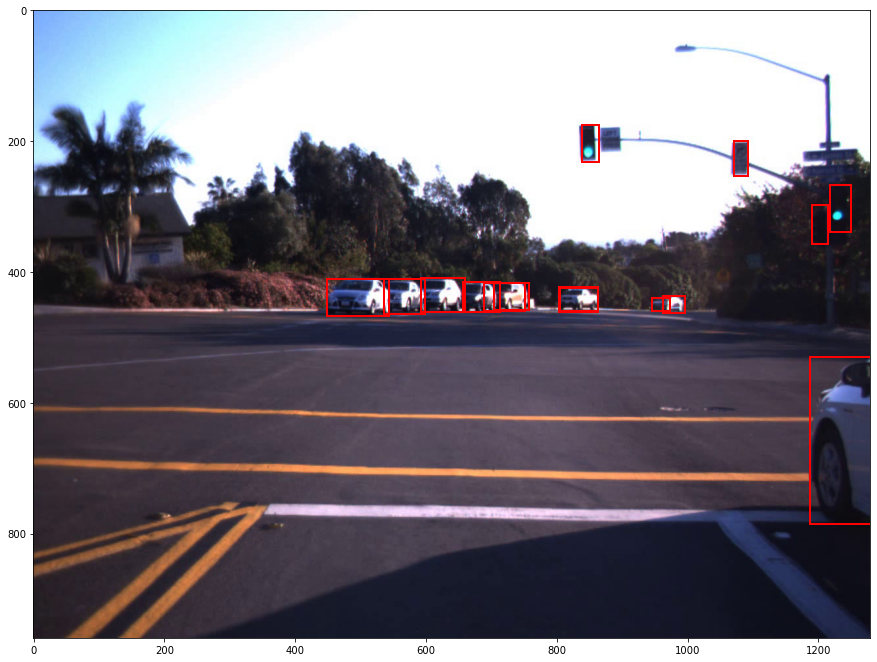

In [39]:
show_image(anns, sample=1)

In [ ]:
# Show selected images and draw boxes


#print('Number of images: ' + str(len(img)))

# Load annotations
annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)

# Get images
img = coco.loadImgs(imgIds)
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img[0]['file_name']))
fig, ax = plt.subplots()

# Colours for boxes
colours = {1: 'red', 3: 'blue', 10: 'green'}

for ann in anns:
    # Draw box
    box = ann['bbox']
    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2,edgecolor=colours[ann['category_id']], facecolor='none')
    ax.add_patch(bb)

ax.imshow(I)
#ax.axis('off')
plt.show()